In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tfidf-over-0.3.csv to tfidf-over-0.3 (1).csv


In [ ]:
import pandas as pd

data1=pd.read_csv('tfidf-over-0.3.csv')

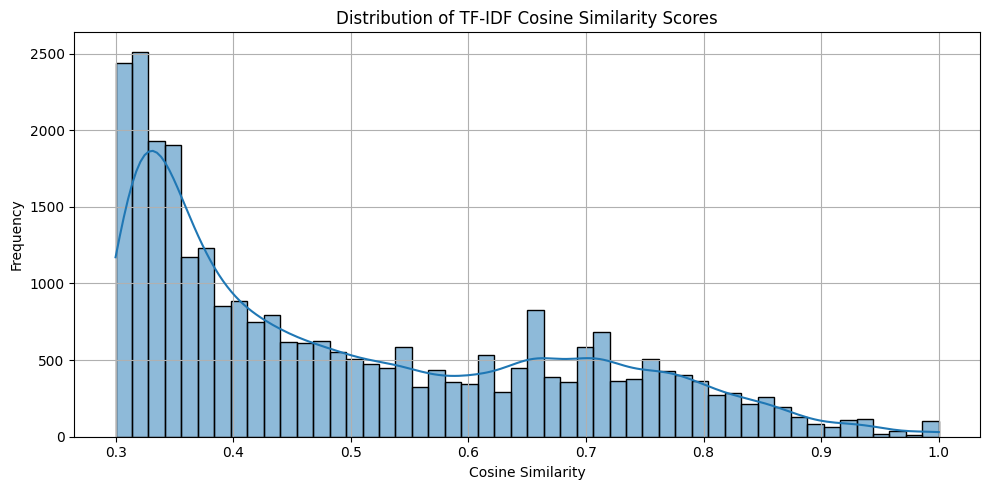

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


data1 = data1.rename(columns={
    'year-1': 'year', 'month-1': 'month', 'day-1': 'day',
      'year-2': 'year_2', 'month-2': 'month_2', 'day-2': 'day_2'
})

data1['date-1'] = pd.to_datetime(dict(year=data1['year'], month=data1['month'], day=data1['day']))

data1['date-2'] = pd.to_datetime(dict(year=data1['year_2'], month=data1['month_2'], day=data1['day_2']))

plt.figure(figsize=(10, 5))

sns.histplot(data1['similarity'], bins=50, kde=True)
plt.title("Distribution of TF-IDF Cosine Similarity Scores")

plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


daily_avg = data1.groupby('date-1')['similarity'].mean().reset_index()

fig_line = px.line(
    daily_avg,
    x='date-1',
    y='similarity',
    title='Average Cosine Similarity per Day (TF-IDF)',
    labels={'date-1': 'Date', 'similarity': 'Average Similarity'},
    markers=True
)
fig_line.show()




In [7]:
edges = data1[['filename-1', 'filename-2', 'similarity']]
edges.columns = ['Source', 'Target', 'Weight']
edges = edges[edges['Weight'] > 0.9]  # Optional: filter strong connections
edges.to_csv("gephi_edges.csv", index=False)


In [9]:
# Create a 'month' column from the date
data1['month'] = pd.to_datetime(data1['year'], format='%Y')  # or use full date
data1['month'] = data1['month'].dt.month

# Prepare edges with article month included
edges = data1[['filename-1', 'filename-2', 'similarity', 'month']]
edges.columns = ['Source', 'Target', 'Weight', 'month']
edges = edges[edges['Weight'] > 0.9]  # optional threshold
edges.to_csv("gephi_edges1.csv", index=False)


In [10]:
from google.colab import files
files.download('gephi_edges1.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>